In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import seaborn as sns
sns.set_context('notebook')

# Here we focus only on data from Lausanne marathon 2016 

In [2]:
trial_dataset = pd.read_csv('../datasets/lausanne_marathon_2016_stefano.csv')
trial_dataset = trial_dataset.drop('Unnamed: 0',axis=1)

# remove useless features
trial_dataset.drop('rang',axis=1,inplace=True)
trial_dataset.drop('retard',axis=1,inplace=True)

# we can re-insert the False, if we get the walk cat
# trial_dataset.drop('pace',axis=1,inplace=True) 

print(trial_dataset.shape)
trial_dataset.head()

(12059, 7)


,cat,sex,nom,an,lieu,temps,pace
0,21,M,Abaidia Jilani,1966,St-Légier-La Chiésaz,"1:45.28,4",4.59
1,21,F,Abaidia Sandrine,1972,St-Légier,"1:49.40,8",5.11
2,False,F,Abaidia Selma,2006,St-Légier-La Chiésaz,"7.12,2",4.48
3,21,M,Abb Jochen,1948,Ernen,"2:50.40,7",8.05
4,10,M,Abbas Dhia,1961,Lausanne,"1:13.04,1",7.18


Printing info on __important runners__ ( :) ):

In [3]:
trial_dataset.loc[trial_dataset.nom=='Lazzari Gianrocco',:]

,cat,sex,nom,an,lieu,temps
6409,10,M,Lazzari Gianrocco,1988,Ecublens VD,"42.59,1"


Counting `False` values and remove them:

In [4]:
sum(trial_dataset.cat=='False')
trial_dataset = trial_dataset[trial_dataset.cat!='False']

trial_dataset.shape

(11247, 6)

There are NO null values:

In [5]:
trial_dataset.isnull().sum()

cat      0
sex      0
nom      0
an       0
lieu     0
temps    0
dtype: int64

#### Mind that the rows are not __unique__, for each runner (runner's name):

In [3]:
len(trial_dataset.nom.unique())==trial_dataset.shape[0]

False

Therefore we compute the distribution of rows/runner:

In [10]:
trial_dataset.nom.value_counts().value_counts()

1    11980
2       38
3        1
Name: nom, dtype: int64

...and it seems there are 38 runners, with 2 rows and _even_ 1 runner with 3 rows: 

In [3]:
for r in trial_dataset.nom.unique():
    
    if (sum(trial_dataset.nom==r)!=1):
        
        print(r)

Allaz Vincent
Bach Philippe
Demont Christophe
Di Rosa Giuseppe
Dutruy Simon
Favre Guillaume
Favre Pauline
Ferreira Fernanda
Ferri Fabio
Fournier Pierre
Gay Julien
Genoud Patrick
Gerber Patrick
Gerber Thomas
Graf Stéphanie
Guignard Romain
Jalloh Ibrahim
Jaquier Philippe
Keller Christian
Lemay Virginie
Lizner Petr
Longchamp Philippe
Michel Julien
Michel Patrick
Nyanduga Nzumbe
Pittet Nicolas
Pittet Olivier
Ribeiro Antonio
Robert Vincent
Rochat Daniel
Schneeberger Christian
Schwab Philippe
Tabone Vincent
Trolliet Camille
Uldry Marc
Verdier Thomas
Vouilloz Cédric
Weber Julien
Weber Nicolas


here is an example:

In [4]:
trial_dataset[trial_dataset.nom=='Allaz Vincent']

,cat,sex,nom,an,lieu,temps,pace
159,10,M,Allaz Vincent,1972,Epalinges,"45.35,3",4.33
160,42,M,Allaz Vincent,1988,Villars-le-Terroir,"3:31.40,5",5.00


__(name,age)__ is NOT unique descriptor:

In [5]:
for r in trial_dataset.nom.unique():
    
    if ( (sum(trial_dataset.nom==r)!=1) and
        (len(trial_dataset[trial_dataset.nom==r].an.unique())==1) ):
        
        print(r)

Fournier Pierre
Gay Julien
Jalloh Ibrahim
Lemay Virginie
Michel Patrick
Nyanduga Nzumbe


... _five_ runner have the __same__ name __and__ age:

In [9]:
trial_dataset[trial_dataset.nom=='Michel Patrick']

,cat,sex,nom,an,lieu,temps,pace
7547,21,M,Michel Patrick,1983,La Chaux-de-Fonds,"1:56.19,9",5.30
7548,10,M,Michel Patrick,1983,Bulle,"1:06.08,5",6.36


__(name,cat)__ is NOT a unique descriptor:

In [10]:
for r in trial_dataset.nom.unique():
    
    if ( (sum(trial_dataset.nom==r)!=1) and
        (len(trial_dataset[trial_dataset.nom==r].cat.unique())==1) ):
        
        print(r)

Di Rosa Giuseppe
Favre Pauline
Genoud Patrick
Gerber Thomas
Graf Stéphanie
Guignard Romain
Jaquier Philippe
Lizner Petr
Pittet Olivier
Ribeiro Antonio
Schwab Philippe
Verdier Thomas
Weber Julien
Weber Nicolas


example:

In [11]:
trial_dataset[trial_dataset.nom=='Pittet Olivier']

,cat,sex,nom,an,lieu,temps,pace
8858,10,M,Pittet Olivier,1967,Cheseaux-sur-Lausanne,"51.20,9",5.08
8859,10,False,Pittet Olivier,1999,Vufflens-la-Ville,"51.13,5",5.07


__(name,age,cat)__ is  a unique descriptor!!:

In [12]:
for r in trial_dataset.nom.unique():
    
    if ( (sum(trial_dataset.nom==r)!=1) and
        (len(trial_dataset[trial_dataset.nom==r].cat.unique())==1) and
        (len(trial_dataset[trial_dataset.nom==r].an.unique())==1) ):
        
        print(r)

## Stats on age

Preparing data:

In [6]:
# Prepare distribution of _all_ runners' age:
age_female_10 = 2016 - trial_dataset[(trial_dataset.sex=='F') & (trial_dataset.cat=='10')].an
age_male_10 = 2016 - trial_dataset[(trial_dataset.sex=='M') & (trial_dataset.cat=='10')].an

age_female_21 = 2016 - trial_dataset[(trial_dataset.sex=='F') & (trial_dataset.cat=='21')].an
age_male_21 = 2016 - trial_dataset[(trial_dataset.sex=='M') & (trial_dataset.cat=='21')].an

age_female_42 = 2016 - trial_dataset[(trial_dataset.sex=='F') & (trial_dataset.cat=='42')].an
age_male_42 = 2016 - trial_dataset[(trial_dataset.sex=='M') & (trial_dataset.cat=='42')].an

###  Women age distribution, by race:

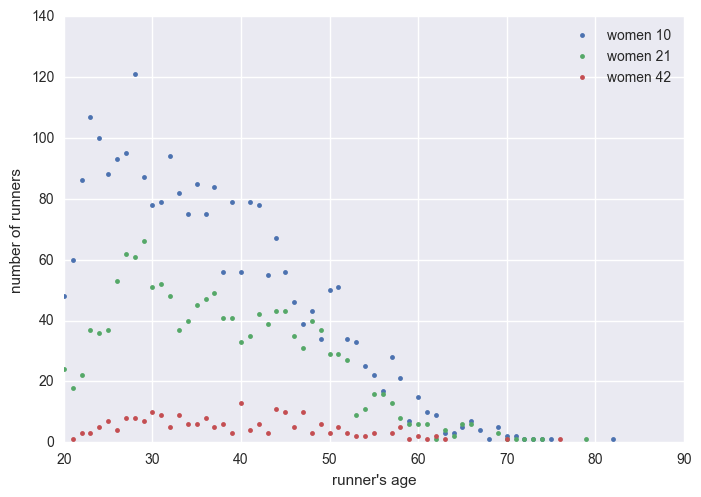

In [7]:
plt.plot(age_female_10.value_counts(),marker='.',linestyle='',label = 'women 10')
plt.plot(age_female_21.value_counts(),marker='.',linestyle='',label = 'women 21')
plt.plot(age_female_42.value_counts(),marker='.',linestyle='',label = 'women 42')

plt.xlabel('runner\'s age')
plt.ylabel('number of runners')
plt.legend()

#### Statistical test on women's age, by category:

In [8]:
stats.ks_2samp(age_female_21,age_female_10)

Ks_2sampResult(statistic=0.069158670333121799, pvalue=0.00025867599203266173)

In [9]:
stats.ks_2samp(age_female_42,age_female_21)

Ks_2sampResult(statistic=0.082361950140389606, pvalue=0.14421995770930032)

In [10]:
stats.ks_2samp(age_female_42,age_female_10)

Ks_2sampResult(statistic=0.13244659796146291, pvalue=0.0014767471293253094)

###  Men age distribution, by race:

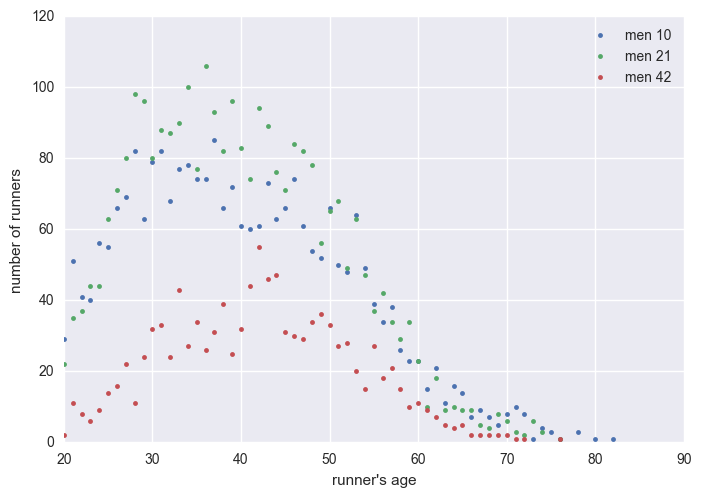

In [11]:
plt.plot(age_male_10.value_counts(),marker='.',linestyle='',label = 'men 10')
plt.plot(age_male_21.value_counts(),marker='.',linestyle='',label = 'men 21')
plt.plot(age_male_42.value_counts(),marker='.',linestyle='',label = 'men 42')

plt.xlabel('runner\'s age')
plt.ylabel('number of runners')
plt.legend()

#### Statistical test on men's age, by category:

In [12]:
stats.ks_2samp(age_male_21,age_male_10)

Ks_2sampResult(statistic=0.032486447956996067, pvalue=0.11434962823975953)

In [13]:
stats.ks_2samp(age_male_42,age_male_21)

Ks_2sampResult(statistic=0.11752974790668802, pvalue=5.5649755760621104e-10)

In [14]:
stats.ks_2samp(age_male_42,age_male_10)

Ks_2sampResult(statistic=0.11826437956082847, pvalue=9.1469336246093692e-10)

## Stats on race VS sex

## Stats on original country 

In [14]:
# sns.countplot(y=trial_dataset.nat)
# plt.ylabel('country of origin')
# plt.xlabel('number of runners')

## Stats on town of residency

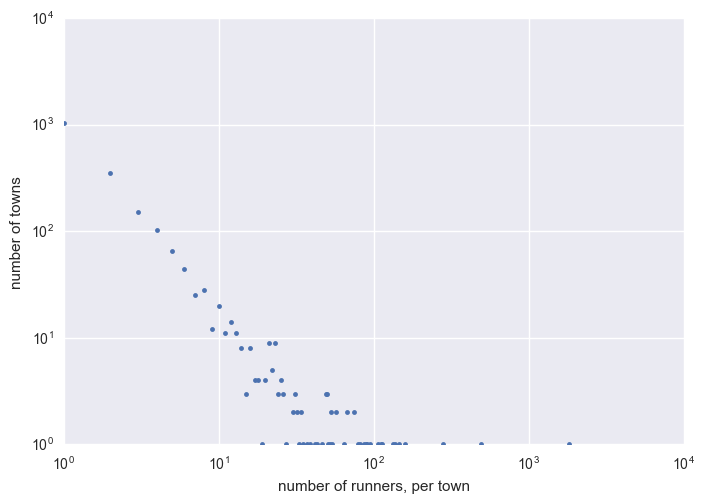

In [15]:
lieu_distr = trial_dataset.lieu.value_counts().value_counts()

plt.loglog(lieu_distr,marker='.',linestyle='')
plt.xlabel('number of runners, per town')
plt.ylabel('number of towns')

## Stats on race time

In [100]:
trial_dataset.temps[0]

'1:45.28,4'

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

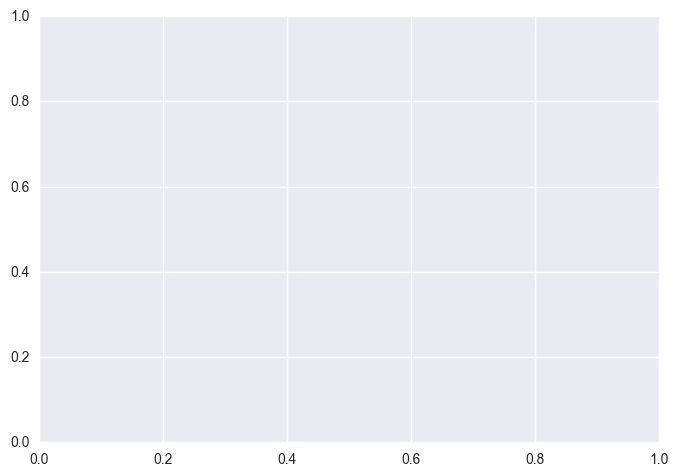

In [126]:
# sns.distplot(trial_dataset.temps,kde=False)
# times_42_male = pd.to_datetime(trial_dataset[(trial_dataset.cat=='42') & (trial_dataset.sex=='M')].temps,format='%H:%M.%S,%f')
# times_42_female = pd.to_datetime(trial_dataset[(trial_dataset.cat=='42') & (trial_dataset.sex=='M')].temps,format='%H:%M.%S,%f')

times_42_male = pd.to_datetime(trial_dataset[trial_dataset.cat=='42'].temps,format='%H:%M.%S,%f')

times_42_male.hist()

# seaborn not working...-.-!!!
# sns.boxplot(times_42_male) #,label='men')
# sns.distplot(times_42_female,label='female')

plt.xticks(rotation=30)

plt.xlabel('time')
plt.ylabel('number of runners')

# OLD CODE 

In [53]:
# sns.distplot(trial_dataset[trial_dataset.sex=='F'].an,kde=False,
#             hist_kws={"histtype": "step", "linewidth": 2},label = 'women')
# sns.distplot(trial_dataset[trial_dataset.sex=='M'].an,kde=False,
#             hist_kws={"histtype": "step", "linewidth": 2},label = 'men')
